In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('data_ref_until_2020-02-13.csv')


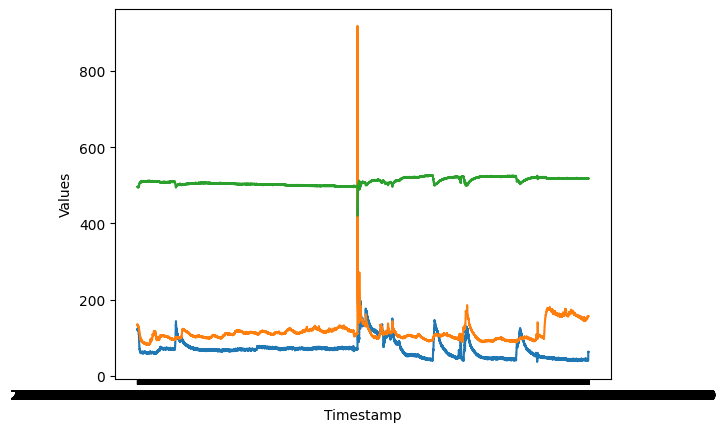

In [16]:
plt.plot(df['timestamp'], df['CO2CosIRValue'])
plt.plot(df['timestamp'], df['COValue'])
plt.plot(df['timestamp'], df['CO2MG811Value'])
# plt.title('Temperature and Humidity Plot for First 100 Data Points')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.show()

In [19]:
df_scatter = pd.read_csv('Bone Tumor Dataset.csv')

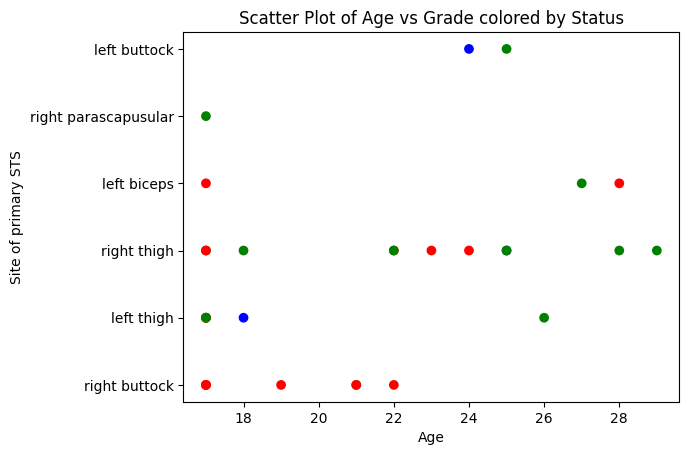

In [21]:
colors = {'NED': 'green', 'AWD': 'blue', 'D': 'red'}
df_sorted = df_scatter.sort_values(by='Age')
df_under_30 = df_sorted[df_sorted['Age'] < 30]
plt.scatter(df_under_30['Age'], df_under_30['Site of primary STS'], color = df_under_30['Status (NED, AWD, D)'].map(colors))
# plt.legend(title="Status (NED, AWD, D)", title_fontsize=13, loc="upper right")
plt.xlabel('Age')
plt.ylabel('Site of primary STS')
plt.title('Scatter Plot of Age vs Grade colored by Status')
plt.show()

In [11]:
df_bar_chart = pd.read_csv('bar.csv')

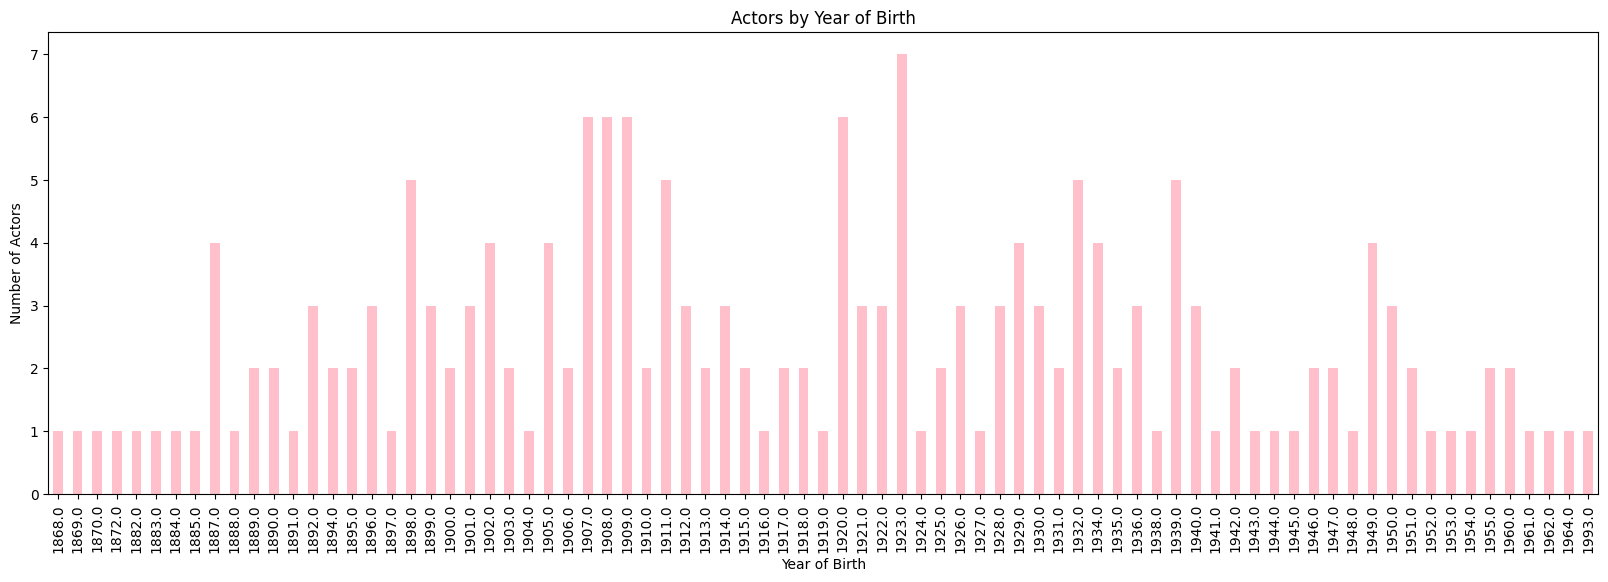

In [54]:
df_bar_chart = df_bar_chart.dropna(subset=['dob'])
df_bar_chart['dob'] = pd.to_numeric(df_bar_chart['dob'], errors='coerce')
actor_counts = df_bar_chart.groupby('dob')['dob'].count()
plt.figure(figsize=(20, 6))
actor_counts.plot(kind='bar', color='pink')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Actors')
plt.title('Actors by Year of Birth')
plt.show()

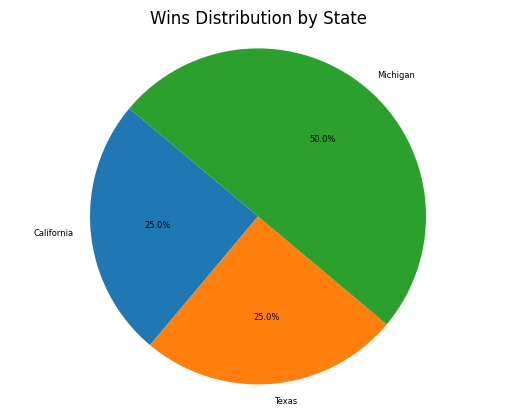

In [91]:
wins_by_state = {}
labelss = ['California', 'Texas','Michigan']
with open('BCSgames.txt', 'r') as file:
    for line in file:
        parts = line.split(',')
        winner_team = parts[2].strip() if float(parts[3]) > float(parts[9]) else parts[8].strip()
        team1_state = parts[2].strip()
        team2_state = parts[8].strip()
        if winner_team == team1_state:
            wins_by_state[team1_state] = wins_by_state.get(team1_state, 0) + 1
        elif winner_team == team2_state:
            wins_by_state[team2_state] = wins_by_state.get(team2_state, 0) + 1
labels = [state for state in labelss if state in wins_by_state]

sizes = [wins_by_state[state] for state in labels]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 6})
plt.axis('equal')
plt.title('Wins Distribution by State')

plt.show()


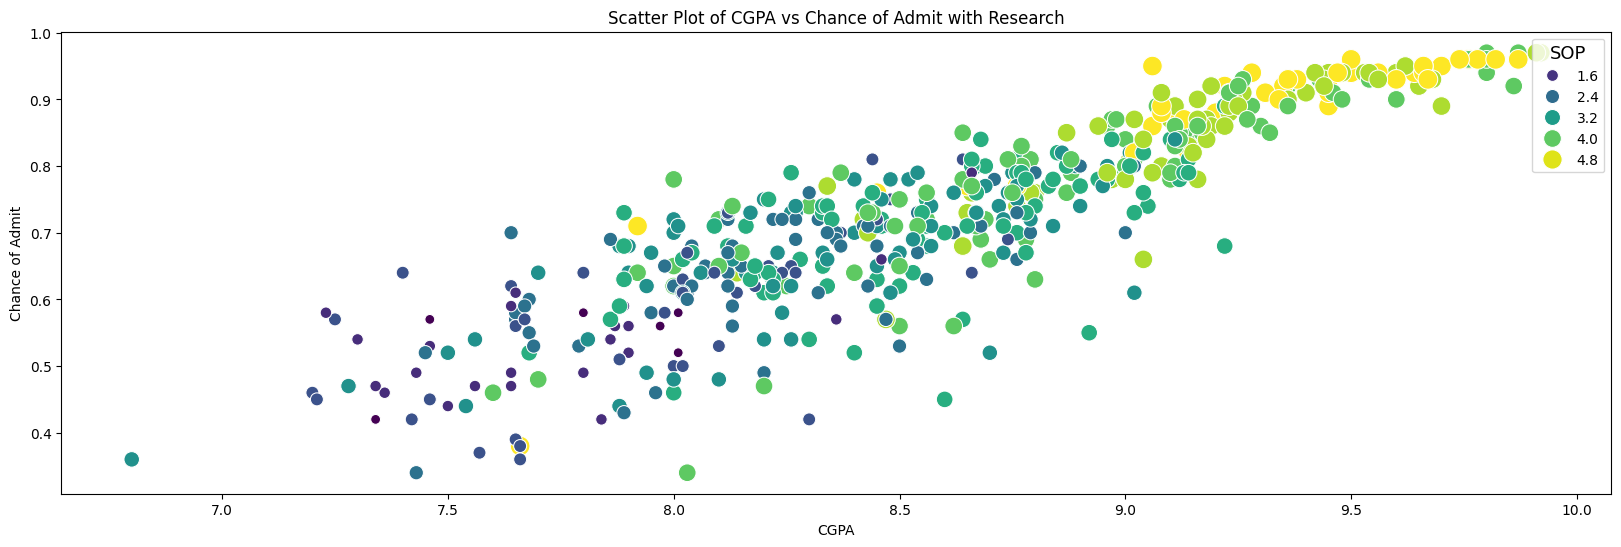

In [24]:
data_sna = pd.read_csv('admission_data.csv')
# print(data_sna.columns)
data_sna = data_sna.rename(columns={"Chance of Admit ": "Chance of Admit"})
plt.figure(figsize=(20, 6))
sns.scatterplot(data=data_sna, x="CGPA", y='Chance of Admit', hue="SOP", palette="viridis", size="SOP", sizes=(50, 200))
plt.legend(title="SOP", title_fontsize=13, loc="upper right")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.title("Scatter Plot of CGPA vs Chance of Admit with Research")
plt.show()


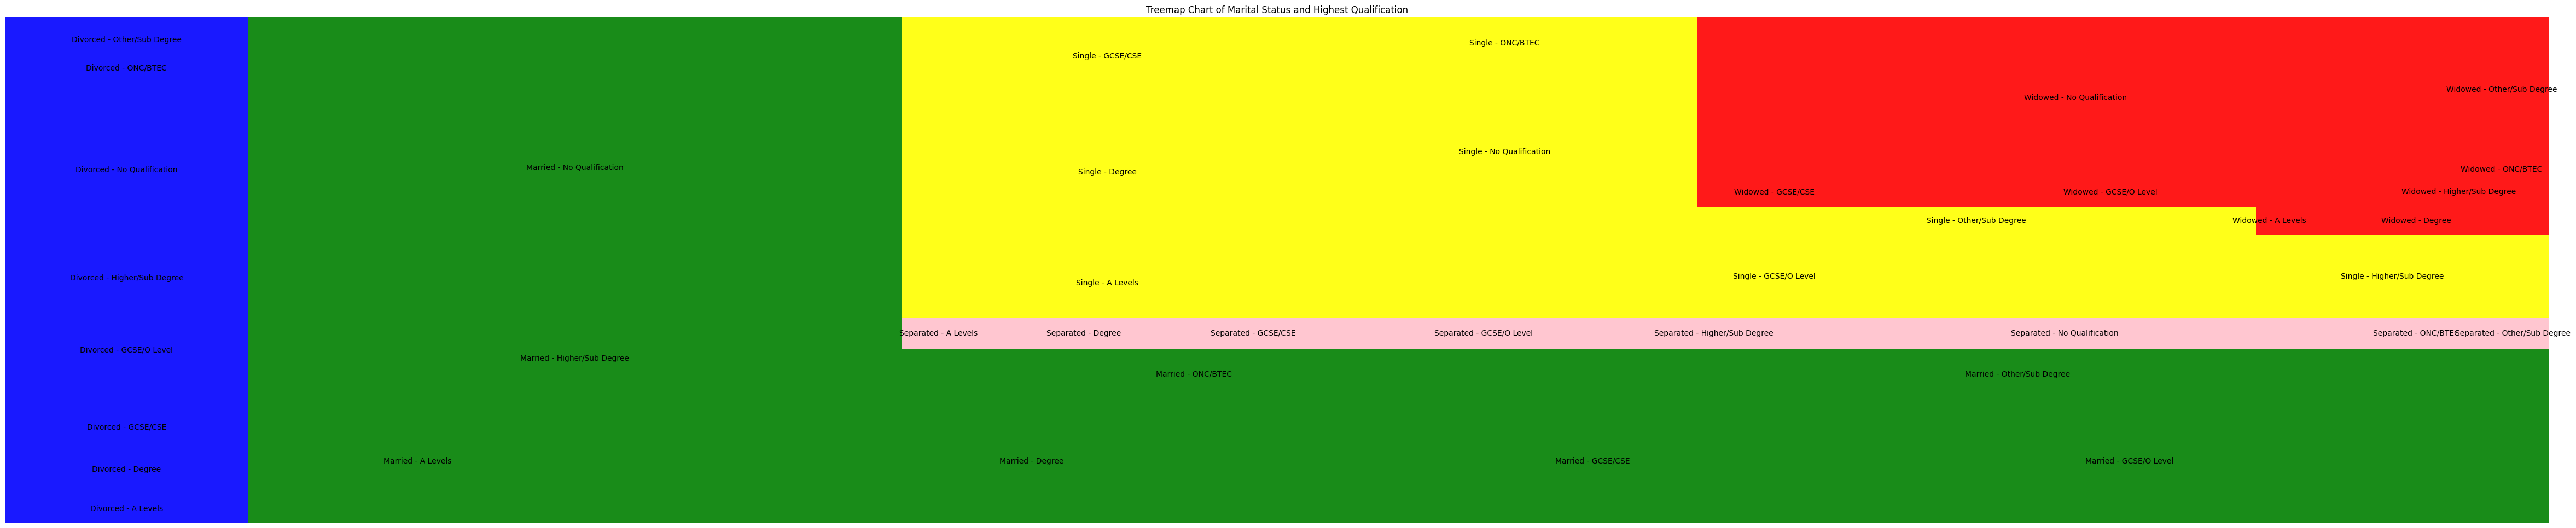

In [42]:
import squarify

df_tree = pd.read_csv('smoking.csv')

color_dict = {
    'Single': 'yellow',
    'Married': 'green',
    'Divorced': 'blue',
    'Separated':'pink',
    'Widowed':'red'
}
count_df = df_tree.groupby(['marital_status', 'highest_qualification']).size().reset_index(name='count')
count_df = count_df.sort_values(['marital_status', 'highest_qualification'])
plt.figure(figsize=(60, 12))
squarify.plot(sizes=count_df['count'], label=count_df['marital_status'] + ' - ' + count_df['highest_qualification'], color=[color_dict[status] for status in count_df['marital_status']], alpha=0.9)
plt.axis('off')
plt.title("Treemap Chart of Marital Status and Highest Qualification")

plt.show()
